In [12]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [13]:
look_back = 8

In [10]:
df = pd.read_csv("datapoints.csv", parse_dates=[0])
df.set_axis(df['timestamp'], inplace=True)
df = df.resample(rule='15T', closed='left', label='left').mean().apply(np.ceil)
type(df)

pandas.core.frame.DataFrame

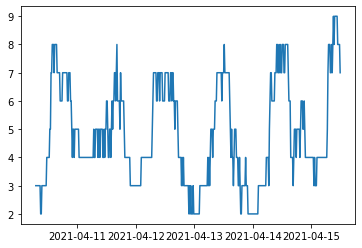

In [4]:
plt.plot(df["value"][500:1000])
plt.show()

In [5]:

df["timestamp"] = df.index
df["value"] = df["value"].replace(np.nan, 0)

parking_data = df["value"].values
parking_data = parking_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(parking_data))

parking_train = parking_data[:split]
parking_test = parking_data[split:]

date_train = df["timestamp"][:split]
date_test = df["timestamp"][split:]

In [6]:
train_generator = TimeseriesGenerator(parking_train, parking_train, length=look_back, batch_size=5)
test_generator = TimeseriesGenerator(parking_test, parking_test, length=look_back, batch_size=1)

for i in test_generator.data:
    print(i)


[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[7.]
[6.]
[6.]
[6.]
[7.]
[7.]
[7.]
[7.]
[6.]
[7.]
[7.]
[7.]
[7.]
[6.]
[5.]
[5.]
[5.]
[4.]
[4.]
[3.]
[4.]
[3.]
[3.]
[3.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[5.]
[6.]
[6.]
[6.]
[6.]
[5.]
[5.]
[5.]
[5.]
[5.]
[5.]
[5.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[5.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[3.]
[3.]
[2.]
[3.]
[3.]
[4.]
[3.]
[3.]
[3.]
[4.]
[4.]
[3.]
[3.]
[2.]
[3.]
[3.]
[4.]
[4.]
[4.]
[4.]
[5.]
[5.]
[5.]
[4.]
[4.]
[5.]
[5.]
[6.]
[6.]
[7.]
[7.]
[7.]
[8.]
[6.]
[6.]
[7.]
[6.]
[6.]
[5.]
[4.]
[5.]
[5.]
[6.]
[6.]
[5.]
[5.]
[5.]
[5.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[5.]
[5.]
[4.]
[4.]
[5.]
[5.]
[5.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[4.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[2.]
[3.]
[3.]
[3.]
[3.]
[3.]
[4.]
[4.]
[4.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]
[3.]


In [18]:
model_adam = Sequential()

model_adam.add(LSTM(25,
        activation='relu',
        input_shape=(look_back,1),
        return_sequences=True)
)
model_adam.add(LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)

model_adam.add(Dense(1))

model_adam.compile(optimizer='adam', loss='mse')

num_epochs = 50

model_adam.fit_generator(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/50
484/484 [==============================] - 2s 4ms/step - loss: 3.1691
Epoch 2/50
484/484 [==============================] - 2s 3ms/step - loss: 0.9338
Epoch 3/50
484/484 [==============================] - 2s 3ms/step - loss: 0.7160
Epoch 4/50
484/484 [==============================] - 2s 4ms/step - loss: 0.6539
Epoch 5/50
484/484 [==============================] - 2s 3ms/step - loss: 0.6421
Epoch 6/50
484/484 [==============================] - 2s 3ms/step - loss: 0.6451
Epoch 7/50
484/484 [==============================] - 2s 4ms/step - loss: 0.6218
Epoch 8/50
484/484 [==============================] - 2s 3ms/step - loss: 0.6259
Epoch 9/50
484/484 [==============================] - 2s 4ms/step - loss: 0.6086
Epoch 10/50
484/484 [==============================] - 2s 4ms/step - loss: 0.6127
Epoch 11/50
484/484 [==============================] - 2s 3ms/step - loss: 0.5996
Epoch 12/50
484/484 [==============================] - 2s 3ms/step - loss: 0.5882
Epoch 13/50
484/484 [====

In [ ]:
model = Sequential()

model.add(LSTM(25,
        activation='relu',
        input_shape=(look_back,1),
        return_sequences=True)
)
model.add(LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

num_epochs = 50

model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

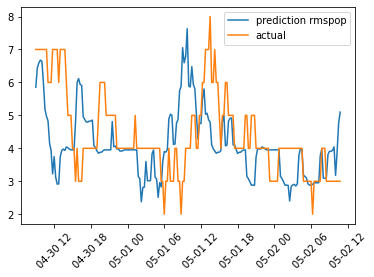

In [22]:
prediction = model.predict(test_generator)

parking_test = parking_test.reshape((-1))
prediction = prediction.reshape((-1))

plt.plot(date_test[:200], prediction[8:208], label='prediction rmspop')
# plt.plot(date_test[:150], prediction_a[:150], label='prediction adam')
plt.plot(date_test[:200], parking_test[:200], label='actual')
plt.xticks(rotation=45)
plt.legend()
plt.show()